In [1]:
from mpl_toolkits.basemap import Basemap
from IPython.display import HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import operator
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
%matplotlib inline

In [2]:
t_file = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1', low_memory=False) 

In [3]:
regions = list(set(t_file.region_txt))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'lightpink', 'lightsage', 'lightgray', 'navy']

## All the attacks on a WorldMap

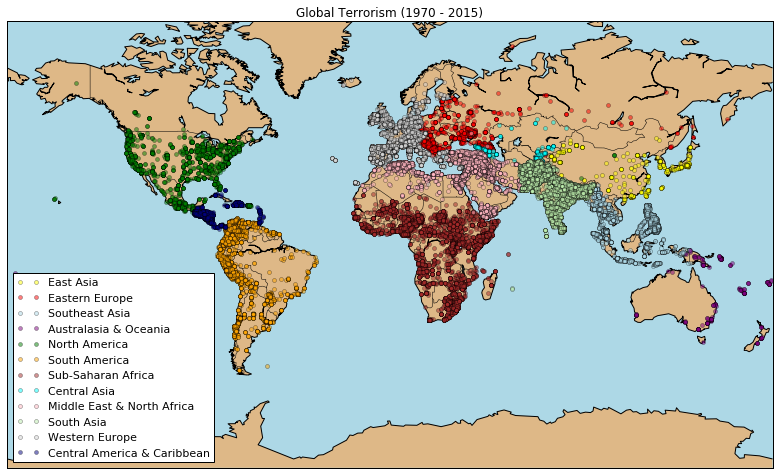

In [4]:
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(t_file.longitude[t_file.region_txt == region].astype("float")),\
            (list(t_file.latitude[t_file.region_txt == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism (1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})

## Most popular terrorist nationality

(u'Iraq', 18285)


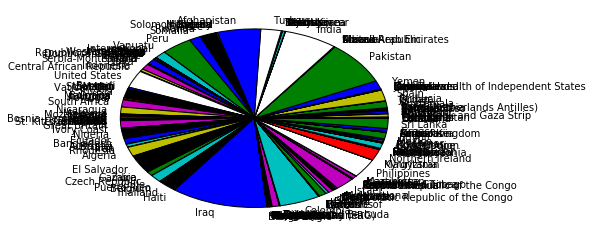

In [5]:
natdic = {}

for i in t_file['natlty1_txt']:
    natdic[i] = natdic.get(i, 1) + 1

#fig = plt.figure(figsize=(30,20))

plt.pie([v for v in natdic.values()], labels=[k for k in natdic.keys()],autopct=None)
print max(natdic.iteritems(), key=operator.itemgetter(1))

## Number of attacks per year in Thailand

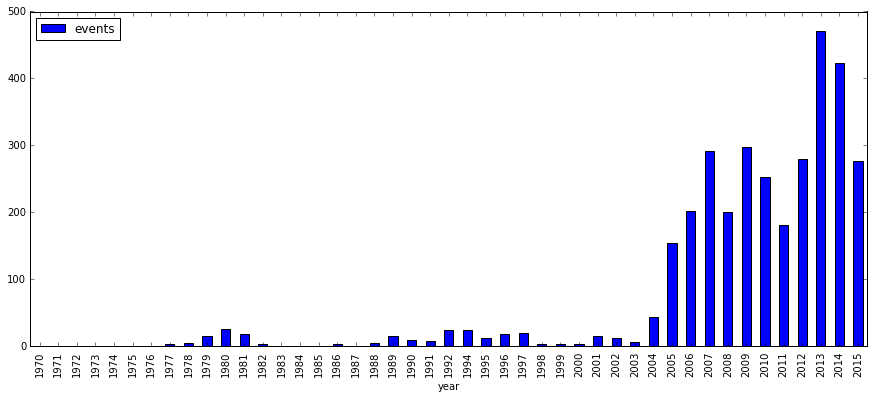

In [6]:
lst_freq_attack = []
thai_year_dict = []
frequent_log = 0
dd = t_file.copy()
for year in set(dd.iyear):
    year_selector = dd['iyear'] == year
    selector = dd[year_selector]
    thailand_selector = selector['country_txt'] == 'Thailand'
    count_thai_selector = selector[thailand_selector].index
    thai_year_dict.append([year, len(count_thai_selector)])
    
thai_year_dict_df = pd.DataFrame(thai_year_dict)
thai_year_dict_df.columns = ['year', 'events']
sort_thai_df = thai_year_dict_df.sort_values(['year','events'], ascending= True)
sort_thai_df.plot(kind='bar',x='year',y='events', figsize=(15,6))

## Country with most attacks within a year

In [7]:
lst_freq_attack = []
year_dict = dict()
for year in set(dd.iyear):
    frequent_log = 0
    year_selector = dd['iyear'] == year
    selector = dd[year_selector]
    for country in set(dd.country_txt):
        country_selector = selector['country_txt'] == country
        ulti_selector = selector[country_selector].index
        if len(ulti_selector) > frequent_log:
            frequent_log = len(ulti_selector)
            year_dict[year] = [country, len(ulti_selector)]

In [8]:
lst_per_year_df = pd.DataFrame(year_dict)
most_event_per_year = lst_per_year_df.T
most_event_per_year.columns = ['country', 'events']

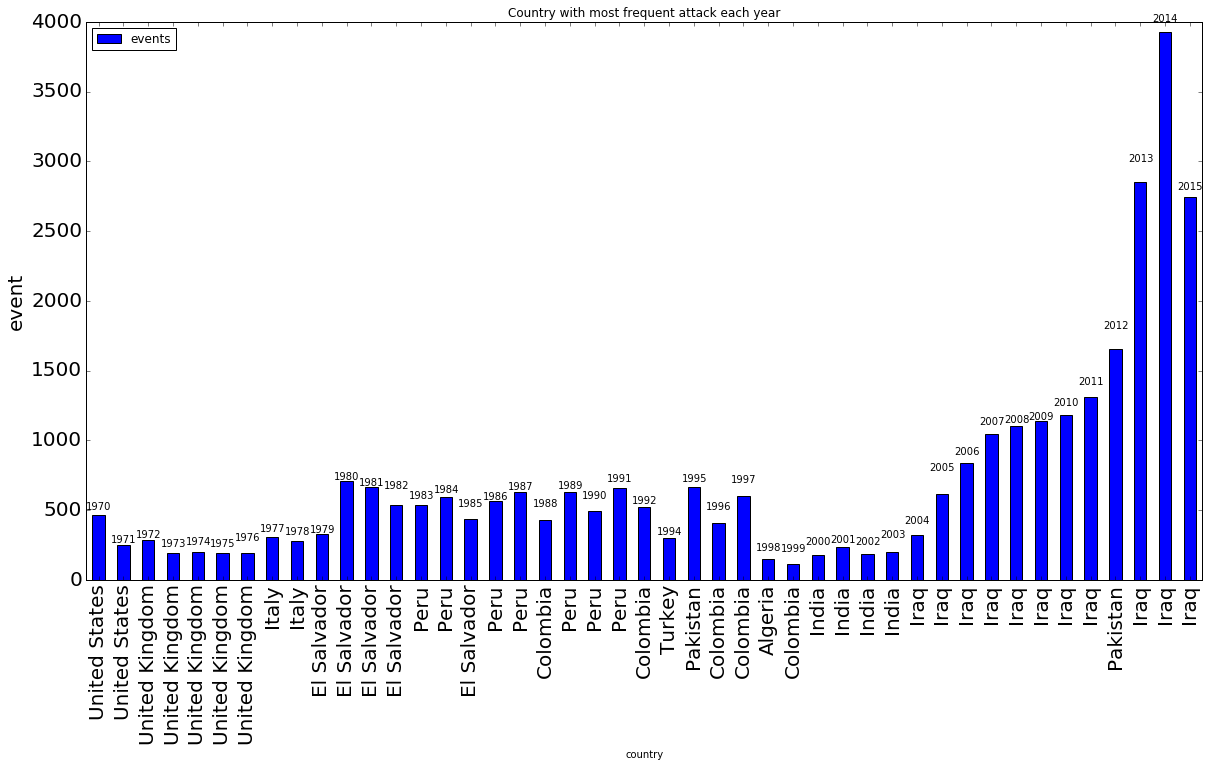

In [9]:
ax = most_event_per_year.plot( x='country', kind='bar',title='Country with most frequent attack each year',figsize=(20,10),fontsize= 20, mark_right=True, use_index=True)

ax.annotate('1970', xy=(0,425 ), xytext=(-0.5, 500) )
ax.annotate('1971', xy=(0,425 ), xytext=(0.5, 270) )
ax.annotate('1972', xy=(0,425 ), xytext=(1.5, 300) )
ax.annotate('1973', xy=(0,425 ), xytext=(2.5, 235) )
ax.annotate('1974', xy=(0,425 ), xytext=(3.5, 250) )
ax.annotate('1975', xy=(0,425 ), xytext=(4.5, 240) )
ax.annotate('1976', xy=(0,425 ), xytext=(5.5, 280) )
ax.annotate('1977', xy=(0,425 ), xytext=(6.5, 345) )
ax.annotate('1978', xy=(0,425 ), xytext=(7.5, 325) )
ax.annotate('1979', xy=(0,425 ), xytext=(8.5, 340) )
ax.annotate('1980', xy=(0,425 ), xytext=(9.5, 720) )
ax.annotate('1981', xy=(0,425 ), xytext=(10.5, 675) )
ax.annotate('1982', xy=(0,425 ), xytext=(11.5, 655) )
ax.annotate('1983', xy=(0,425 ), xytext=(12.5, 585) )
ax.annotate('1984', xy=(0,425 ), xytext=(13.5, 625) )
ax.annotate('1985', xy=(0,425 ), xytext=(14.5, 525) )
ax.annotate('1986', xy=(0,425 ), xytext=(15.5, 575) )
ax.annotate('1987', xy=(0,425 ), xytext=(16.5, 645) )
ax.annotate('1988', xy=(0,425 ), xytext=(17.5, 525) )
ax.annotate('1989', xy=(0,425 ), xytext=(18.5, 655) )
ax.annotate('1990', xy=(0,425 ), xytext=(19.5, 585) )
ax.annotate('1991', xy=(0,425 ), xytext=(20.5, 705) )
ax.annotate('1992', xy=(0,425 ), xytext=(21.5, 545) )
ax.annotate('1994', xy=(0,425 ), xytext=(22.5, 325) )
ax.annotate('1995', xy=(0,425 ), xytext=(23.5, 705) )
ax.annotate('1996', xy=(0,425 ), xytext=(24.5, 505) )
ax.annotate('1997', xy=(0,425 ), xytext=(25.5, 700) )
ax.annotate('1998', xy=(0,425 ), xytext=(26.5, 210) )
ax.annotate('1999', xy=(0,425 ), xytext=(27.5, 200) )
ax.annotate('2000', xy=(0,425 ), xytext=(28.5, 255) )
ax.annotate('2001', xy=(0,425 ), xytext=(29.5, 270) )
ax.annotate('2002', xy=(0,425 ), xytext=(30.5, 250) )
ax.annotate('2003', xy=(0,425 ), xytext=(31.5, 300) )
ax.annotate('2004', xy=(0,425 ), xytext=(32.5, 400) )
ax.annotate('2005', xy=(0,425 ), xytext=(33.5, 780) )
ax.annotate('2006', xy=(0,425 ), xytext=(34.5, 900) )
ax.annotate('2007', xy=(0,425 ), xytext=(35.5, 1110) )
ax.annotate('2008', xy=(0,425 ), xytext=(36.5, 1125) )
ax.annotate('2009', xy=(0,425 ), xytext=(37.5, 1150) )
ax.annotate('2010', xy=(0,425 ), xytext=(38.5, 1250) )
ax.annotate('2011', xy=(0,425 ), xytext=(39.5, 1400) )
ax.annotate('2012', xy=(0,425 ), xytext=(40.5, 1800) )
ax.annotate('2013', xy=(0,425 ), xytext=(41.5, 3000) )
ax.annotate('2014', xy=(0,425 ), xytext=(42.5, 4000) )
ax.annotate('2015', xy=(0,425 ), xytext=(43.5, 2800) )
ax.set_ylabel("event",fontsize=20)

## Did the number of attacks increase per year?

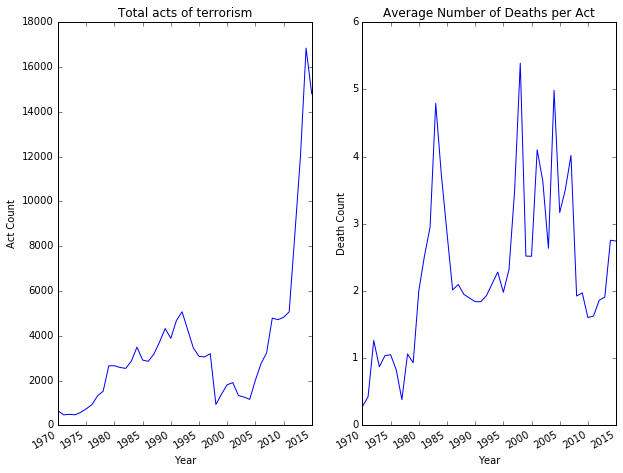

In [10]:
count_year = t_file.groupby(['iyear']).count()
mean_year = t_file.groupby(['iyear']).mean()

fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set(title = 'Total acts of terrorism', ylabel = 'Act Count', xlabel = 'Year')
ax1.plot(count_year.index, count_year.eventid)
ax2.set(title = 'Average Number of Deaths per Act', ylabel = 'Death Count', xlabel = 'Year')
ax2.plot(mean_year.index, mean_year.nkill)
fig.autofmt_xdate()

## Success rate of attacks

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



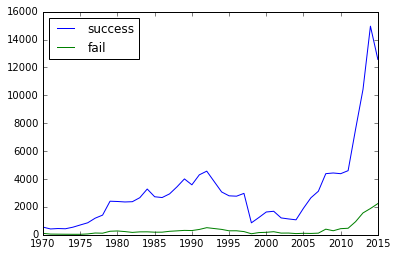

In [11]:
d = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',  
                usecols=[0, 1, 2, 3, 8, 11, 13, 14, 26, 29, 35, 37, 84, 100, 103]
               )

d = d.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'success':'success',
             'targtype1_txt':'target', 'targsubtype1_txt' : 'targetsub',
             'weaptype1_txt':'weapon', 'attacktype1_txt':'attack',
             'nkill':'fatalities', 'nwound':'injuries'})

d['fatalities'] = d['fatalities'].fillna(0).astype(int)
d['injuries'] = d['injuries'].fillna(0).astype(int)
d['day'][d.day == 0] = 1
d['month'][d.month == 0] = 1
d['date'] = pd.to_datetime(d[['day', 'month', 'year']])

success_counts=d[d.success==1]['year'].value_counts().sort_index()
fail_counts=d[d.success==0]['year'].value_counts().sort_index()
plt.plot(success_counts,label="success")
plt.plot(fail_counts,label="fail")
plt.legend(loc=2)

## Success rate of attacks in Thailand

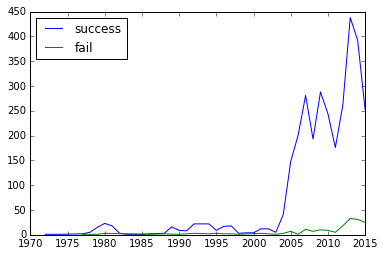

In [12]:
Thaiterror = d[(d.country == 'Thailand')]
success_counts=Thaiterror[Thaiterror.success==1]['year'].value_counts().sort_index()
fail_counts=Thaiterror[Thaiterror.success==0]['year'].value_counts().sort_index()
plt.plot(success_counts,label="success")
plt.plot(fail_counts,label="fail")
plt.legend(loc=2)

## Predict the future success rate

Random Forest accuracy score: 
0.907957263594


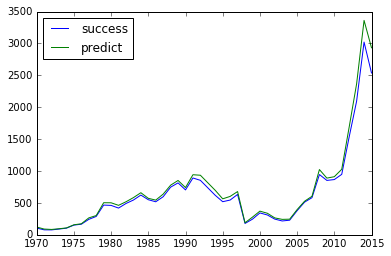

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

d = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',  
                usecols=[0, 1, 2, 3, 8, 11, 13, 14, 26, 29, 35, 37, 84, 100, 103])
 
d = d.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'success':'success','targtype1_txt':'target', 
             'targsubtype1_txt' : 'targetsub',
             'weaptype1_txt':'weapon', 'attacktype1_txt':'attack',
             'nkill':'fatalities', 'nwound':'injuries'})


success=pd.DataFrame(d['success'])
date = pd.DataFrame(d["year"])

success = pd.concat([success, date], axis =1)

features=pd.concat( [pd.get_dummies(d['attack'],prefix='atk'),
                    pd.get_dummies(d['weapon'],prefix='wpn')     
                    ],axis=1)

features_train, features_test,target_train, target_test = train_test_split(features,success, test_size = 0.2,random_state=0)
ids = features_test.index
#Random Forest
forest=RandomForestClassifier(n_estimators=10)
forest = forest.fit( features_train, target_train['success'])

output = forest.predict(features_test).astype(int)
results1 = pd.DataFrame(data=output,index=ids,columns=['prediction'])
results = target_test.join(results1)

print("Random Forest accuracy score: " )
print(accuracy_score(results['success'],results['prediction']))
success_counts=results[results.success==1]['year'].value_counts().sort_index()
predic=results[results.prediction==1]['year'].value_counts().sort_index()
plt.plot(success_counts,label="success")
plt.plot(predic,label="predict")
plt.legend(loc=2)

In [14]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()

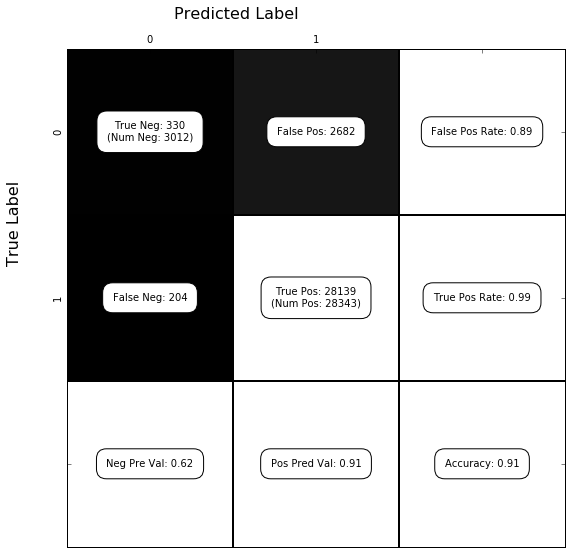

In [15]:
conf=confusion_matrix(results['success'],results['prediction']) # 2682 false positives, 28139 true positives
#plt.imshow(conf, cmap='binary', interpolation='None')
show_confusion_matrix(conf)

In [46]:
from sklearn.svm import SVR

data = np.unique(date)
X = np.array(data)
Y = np.array(success_counts)

svr = SVR(kernel='rbf', C=1e5, gamma=0.01)
future = [2016,2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
past = [2010,2011,2012,2013,2014,2015]
index = [29,30,31,32, 33, 34]
minuspastX = np.delete(X, index)
minuspastY = np.delete(Y, index)
accutestingY = Y[-6:]
test = np.array(future)
#all_test = np.concatenate((data, test), axis=0)

svr.fit(X.reshape(-1,1), Y.flatten())
pred_SVR = svr.predict(test.reshape(-1,1))

# test = np.array(past)
# svr.fit(minuspastX.reshape(-1,1),minuspastY.flatten())
# pred_SVR = svr.predict(test.reshape(-1,1))
# pred_SVR.astype(int)
# accutestingY, pred_SVR
# ###print(accuracy_score(accutestingY,pred_SVR))

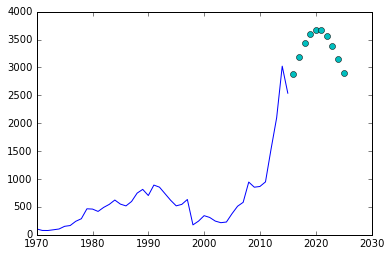

In [47]:
plt.plot(test, pred_SVR, 'co', label='SVR')
plt.plot(success_counts)

In [18]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                  1.124445
p-value                         0.995420
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (1%)            -3.588573
Critical Value (10%)           -2.603185
dtype: float64


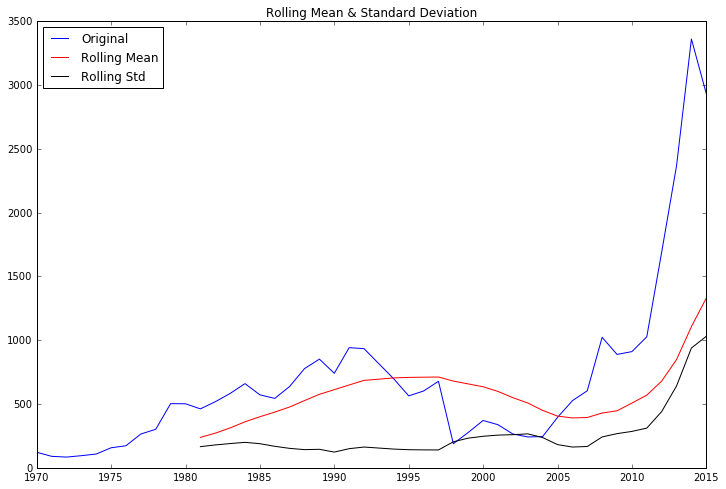

In [52]:
test_stationarity(predic)
# tests the null hypothesis of a unit root is present in a time series 
# a unit root is a feature of some stochastic processes that can cause problems in statistical inference 
# involving time series models

Results of Dickey-Fuller Test:
Test Statistic                 -0.735371
p-value                         0.837374
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (1%)            -3.588573
Critical Value (10%)           -2.603185
dtype: float64


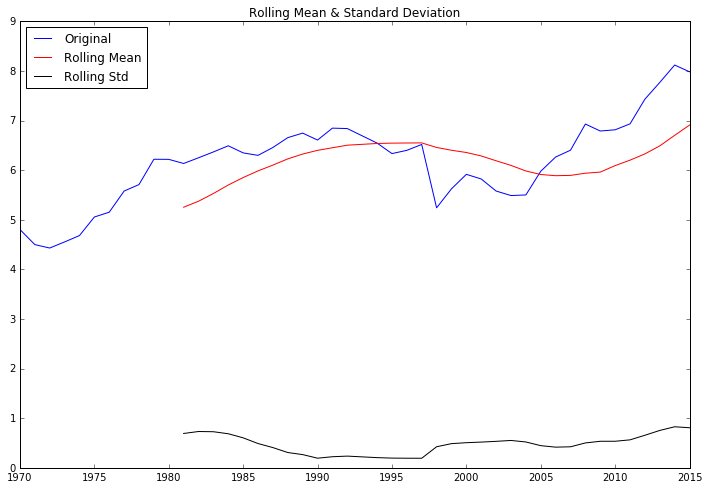

In [54]:
d.riders_log= predic.apply(lambda x: np.log(x))  
test_stationarity(d.riders_log)

In [50]:
# d['first_difference'] = predic- predic.shift(1)  
# test_stationarity(d.first_difference.dropna(inplace=False))

Results of Dickey-Fuller Test:
Test Statistic                -6.431637e+00
p-value                        1.691709e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.300000e+01
Critical Value (5%)           -2.931550e+00
Critical Value (1%)           -3.592504e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


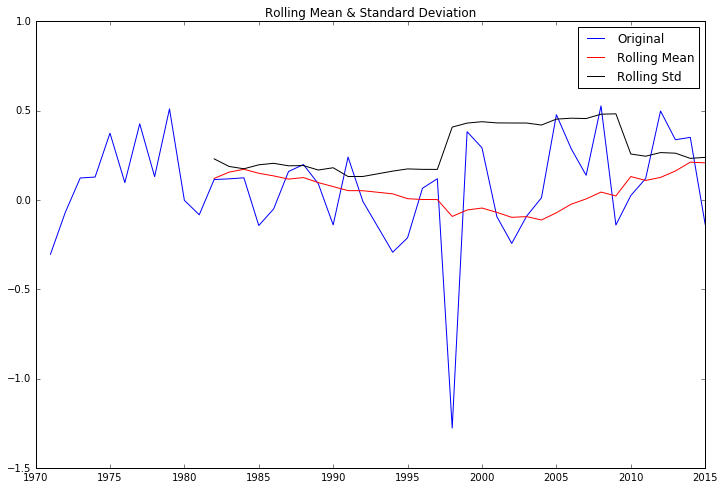

In [55]:
d['log_first_difference'] = d.riders_log - d.riders_log.shift(1)  
test_stationarity(d.log_first_difference.dropna(inplace=False))

In [23]:
# import statsmodels.api as sm  

# fig = plt.figure(figsize=(8,5))
# ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(d.log_first_difference, lags=12, ax=ax1)
# ax2 = fig.add_subplot(212)

## Number of attacks in Thailand

In [24]:
dt = d[(d.country == 'Thailand')]
print len(dt), "total attacks" 
print len(dt) / (2015 - 1970.), "attacks per year on Average"

3338 total attacks
74.1777777778 attacks per year on Average


## Attack in Thailand with most killed

In [25]:
maxdeaths = max(dt.fatalities)

dmaxd = dt[(dt.fatalities == maxdeaths)]
dmaxd

,id,year,month,day,country,state,latitude,longitude,success,attack,target,targetsub,weapon,fatalities,injuries,first_difference,log_first_difference
8460,197905300003,1979,5,30,Thailand,NaN,17.770278,102.189444,1,Bombing/Explosion,Military,Military Unit/Patrol/Convoy,Explosives/Bombs/Dynamite,27.0,3.0,NaN,NaN


## Deaths Per Year in Thailand

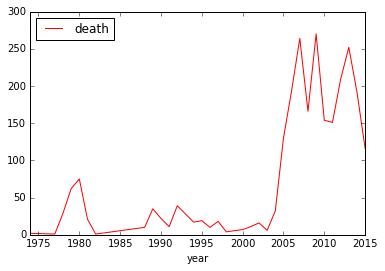

In [26]:
lst_per_year_thailand = []
for year in set(d.year):
    year_selector = d['year'] == year
    yo = d[year_selector]
    selector = yo['country'] == 'Thailand'
    yearkill = yo[selector]['fatalities'].sum()
    lst_per_year_thailand.append([year, yearkill])
    
lst_per_year_thailand_df = pd.DataFrame(lst_per_year_thailand, columns=['year','death'])
lst_per_year_thailand_df = lst_per_year_thailand_df[lst_per_year_thailand_df.death != 0]

lst_per_year_thailand_df.sort_values(['death', 'year'], ascending=[False, True]).head(30)

lst_per_year_thailand_df.plot(x='year',y='death', color= 'red')

## Safest countries (Least attacks)

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



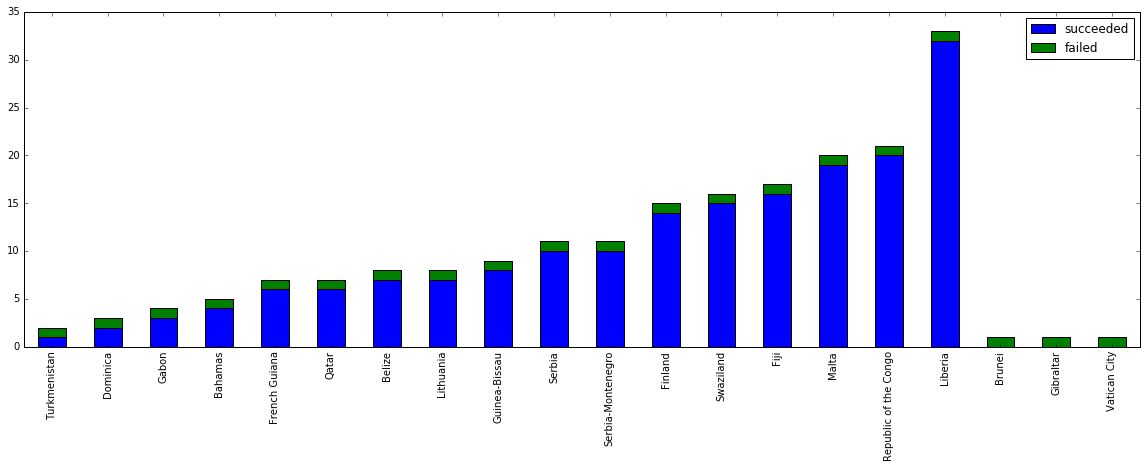

In [35]:
# least attacks
# Is thailand safe?

d['day'][d.day == 0] = 1
d['month'][d.month == 0] = 1
d['date'] = pd.to_datetime(d[['day', 'month','year']])
countbycountry = d[d.success == 0].groupby('country').count()['date']
df=pd.DataFrame(index=countbycountry[countbycountry<2].index.unique()) # Lesser than 2 failed attacks
df["succeeded"] = d[d.success == 1].groupby('country').count()['date']
df["failed"]= d[d.success!= 1].groupby('country')['date'].count()
df = df.sort_values('succeeded')
df.plot(kind='bar', stacked= True, figsize=(20,6))

## Are developed countries safer?



http://www.nationsonline.org/oneworld/human_development.htm 
    

In [28]:
develop = ['Norway','Australia', 'Netherlands', 'United States', 'New Zealand', 'Canada', 'Ireland','Liechtenstein',
          'Germany', ' Sweden', 'Switzerland', 'Japan', 'Hong Kong', 'Iceland', 'South Korea', 'Denmark', 'Israel',
          'Belgium', 'Austria', 'France', 'Slovenia', 'Finland', 'Spain', 'Italy', 'Luxem']

developeddt = d.copy()

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



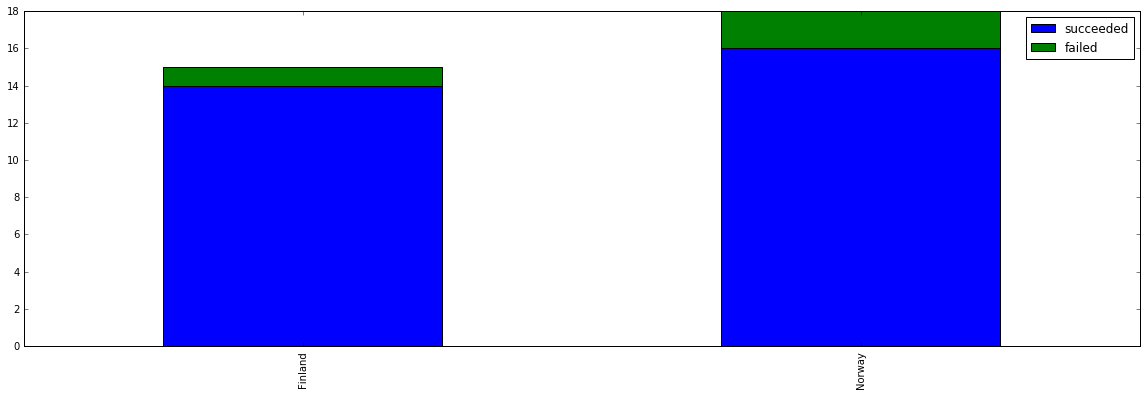

In [36]:
developeddt = developeddt.loc[d['country'].isin(develop)]
developeddt['day'][developeddt.day == 0] = 1
developeddt['month'][developeddt.month == 0] = 1
developeddt['date'] = pd.to_datetime(developeddt[['day', 'month','year']])
countbycountry = developeddt[developeddt.success == 0].groupby('country').count()['date']
df=pd.DataFrame(index=countbycountry[countbycountry<=2].index.unique()) # Lesser than or equal to 2 failed attacks
df["succeeded"] = developeddt[developeddt.success == 1].groupby('country').count()['date']
df["failed"]= developeddt[developeddt.success!= 1].groupby('country')['date'].count()
df = df.sort_values('succeeded')
df.plot(kind='bar', stacked= True, figsize=(20,6))

## Terrorist groups and their targets

In [30]:
# Association rules 

## Countries with most failed attacks

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



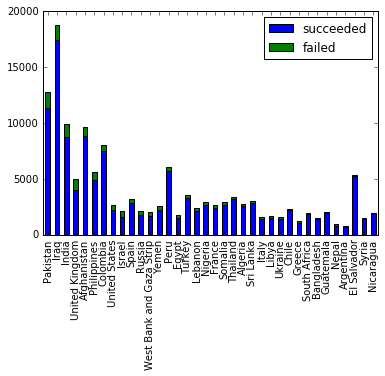

In [57]:
d['day'][d.day == 0] = 1
d['month'][d.month == 0] = 1
d['date'] = pd.to_datetime(d[['day', 'month','year']])
countbycountry = d[d.success == 1].groupby('country').count()['date']

df=pd.DataFrame(index=countbycountry[countbycountry>700].index.unique())
df["succeeded"] = d[d.success == 1].groupby('country').count()['date']
df["failed"]= d[d.success!= 1].groupby('country')['date'].count()
df[df.failed >0].sort_values(by='failed',ascending=False).plot(kind='bar', stacked= True)

In [32]:
terror_data = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',
                          usecols=[0, 1, 2, 3, 8, 11, 13, 14, 35, 84, 100, 103])
terror_data = terror_data.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'targtype1_txt':'target',
             'weaptype1_txt':'weapon', 'nkill':'fatalities', 'nwound':'injuries'})
terror_data['fatalities'] = terror_data['fatalities'].fillna(0).astype(int)
terror_data['injuries'] = terror_data['injuries'].fillna(0).astype(int)

terror_usa = terror_data[(terror_data.country == 'United States') &
                         (terror_data.state != 'Puerto Rico') &
                         (terror_data.longitude < 0)]
terror_usa['day'][terror_usa.day == 0] = 1
terror_usa['date'] = pd.to_datetime(terror_usa[['day', 'month', 'year']])

terror_usa = terror_usa[['id', 'date', 'year', 'state', 'latitude', 'longitude',
                         'target', 'weapon', 'fatalities', 'injuries']]
terror_usa = terror_usa.sort_values(['fatalities', 'injuries'], ascending = False)
terror_usa = terror_usa.drop_duplicates(['date', 'latitude', 'longitude', 'fatalities'])

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\Anaconda2\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2885: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning:


A 

## Terrorist attacks by Weapon Type in the US

In [33]:
weapon_codes = []

for attack in terror_usa['weapon'].values:
    if attack in ['Explosives/Bombs/Dynamite', 'Sabotage Equipment']:
        weapon_codes.append(1)
    elif attack == 'Incendiary':
        weapon_codes.append(2)
    elif attack in ['Firearms', 'Fake Weapons']:
        weapon_codes.append(3)
    elif attack == 'Melee':
        weapon_codes.append(5)
    elif attack == 'Biological':
        weapon_codes.append(6)
    elif attack in ['Chemical', 'Radiological']:
        weapon_codes.append(7)
    elif 'Vehicle' in attack:
        weapon_codes.append(8)
    else:
        weapon_codes.append(4)

terror_usa['weapon'] = weapon_codes
weapon_categories = ['Explosives', 'Flammables', 'Firearms', 'Miscellaneous',
                     'Knives', 'Bacteria/Viruses', 'Chemicals', 'Vehicles']

# terrorist attacks by weapon
weapon_count = np.asarray(terror_usa.groupby('weapon').weapon.count())
weapon_percent = np.round(weapon_count / sum(weapon_count) * 100, 2)

# terrorist attack fatalities by weapon
weapon_fatality = np.asarray(terror_usa.groupby('weapon')['fatalities'].sum())
weapon_yaxis = np.asarray([1.93, 1.02, 2.28, 0.875, 0.945, 0.83, 0.835, 3.2])

# terrorist attack injuries by weapon
weapon_injury = np.asarray(terror_usa.groupby('weapon')['injuries'].sum())
weapon_xaxis = np.log10(weapon_injury)

weapon_text = []
for i in range(0, 8):
    weapon_text.append(weapon_categories[i] + ' (' + weapon_percent[i].astype(str) 
                       + '%)<br>' + weapon_fatality[i].astype(str) + ' Killed, '
                       + weapon_injury[i].astype(str) + ' Injured')

weapon_fatality[6] = 7
    
data = [go.Scatter(
        x = weapon_injury,
        y = weapon_fatality,
        text = weapon_text,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            size = (weapon_count + 50) / 10,
            opacity = 0.9,
            color = 'rgb(240, 140, 45)')
        )]

layout = go.Layout(
         title = 'Terrorist Attacks by Weapon in United States (1970-2015)',
         xaxis = dict(
             title = 'Injuries',
             type = 'log',
             range = [0.45, 3.51],
             tickmode = 'auto',
             nticks = 4,
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             title = 'Fatalities',
             type = 'log',
             range = [0.65, 3.33],
             tickmode = 'auto',
             nticks = 3,
             showline = True,
             showgrid = False)
         )

annotations = []
for i in range(0, 8):
    annotations.append(dict(x=weapon_xaxis[i], y=weapon_yaxis[i],
                            xanchor='middle', yanchor='top',
                            text=weapon_categories[i], showarrow=False))
layout['annotations'] = annotations

figure = dict(data = data, layout = layout)
iplot(figure)

## Terrorist attacks by targets in the US

In [34]:
# terrorist attack targets grouped in categories
target_codes = []

for attack in terror_usa['target'].values:
    if attack in ['Business', 'Journalists & Media', 'NGO']:
        target_codes.append(1)
    elif attack in ['Government (General)', 'Government (Diplomatic)']:
        target_codes.append(2)
    elif attack == 'Abortion Related':
        target_codes.append(4)
    elif attack == 'Educational Institution':
        target_codes.append(5)
    elif attack == 'Police':
        target_codes.append(6)
    elif attack == 'Military':
        target_codes.append(7)
    elif attack == 'Religious Figures/Institutions':
        target_codes.append(8)
    elif attack in ['Airports & Aircraft', 'Maritime', 'Transportation']:
        target_codes.append(9)
    elif attack in ['Food or Water Supply', 'Telecommunication', 'Utilities']:
        target_codes.append(10)
    else:
        target_codes.append(3)

terror_usa['target'] = target_codes
target_categories = ['Business', 'Government', 'Individuals', 'Healthcare', 'Education',
                     'Police', 'Military', 'Religion', 'Transportation', 'Infrastructure']

# terrorist attacks by target
target_count = np.asarray(terror_usa.groupby('target').target.count())
target_percent = np.round(target_count / sum(target_count) * 100, 2)

# terrorist attack fatalities by target
target_fatality = np.asarray(terror_usa.groupby('target')['fatalities'].sum())
target_yaxis = np.asarray([1.33, 2.36, 2.98, 0.81, 1.25, 1.71, 1.31, 1.53, 1.34, 0])

# terrorist attack injuries by target
target_injury = np.asarray(terror_usa.groupby('target')['injuries'].sum())
target_xaxis = np.log10(target_injury)

target_text = []
for i in range(0, 10):
    target_text.append(target_categories[i] + ' (' + target_percent[i].astype(str) 
                       + '%)<br>' + target_fatality[i].astype(str) + ' Killed, '
                       + target_injury[i].astype(str) + ' Injured')

data = [go.Scatter(
        x = target_injury,
        y = target_fatality,
        text = target_text,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            size = target_count / 6.5,
            opacity = 0.9,
            color = 'rgb(240, 140, 45)')
        )]

layout = go.Layout(
         title = 'Terrorist Attacks by Target in United States (1970-2015)',
         xaxis = dict(
             title = 'Injuries',
             type = 'log',
             range = [1.36, 3.25],
             tickmode = 'auto',
             nticks = 2,
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             title = 'Fatalities',
             type = 'log',
             range = [0.59, 3.45],
             tickmode = 'auto',
             nticks = 4,
             showline = True,
             showgrid = False)
         )

annotations = []
for i in range(0, 10):
    annotations.append(dict(x=target_xaxis[i], y=target_yaxis[i],
                            xanchor='middle', yanchor='top',
                            text=target_categories[i], showarrow=False))
layout['annotations'] = annotations

figure = dict(data = data, layout = layout)
iplot(figure)

## Popular attack types back then vs now

In [35]:
lst_freq_attack = []
weapon_type = dict()
for year in set(dd.iyear):
    frequent_log = 0
    year_selector = dd['iyear'] == year
    selector = dd[year_selector]
    bomb = selector['attacktype1_txt'] == 'Bombing/Explosion'
    unarm_assault = selector['attacktype1_txt'] == 'Unarmed Assault'
    hijack = selector['attacktype1_txt'] == 'Hijacking'
    assassination = selector['attacktype1_txt'] == 'Assassination'
    hostage = selector['attacktype1_txt'] == 'Hostage Taking (Barricade Incident)'
    facility = selector['attacktype1_txt'] == 'Facility/Infrastructure Attack'
    kidnap = selector['attacktype1_txt'] == 'Hostage Taking (Kidnapping)'
    arm_assualt = selector['attacktype1_txt'] == 'Armed Assault'
    unknown = selector['attacktype1_txt'] == 'Unknown'
    
    bomb_count = selector[bomb].index
    unarm_assault_count = selector[unarm_assault].index
    hijack_count = selector[hijack].index
    assassination_count = selector[assassination].index
    hostage_count = selector[hostage].index
    facility_count = selector[facility].index
    kidnap_count = selector[kidnap].index
    arm_assualt_count = selector[arm_assualt].index
    unknown_count = selector[unknown].index
    
    weapon_type[year] = [len(bomb_count), len(unarm_assault_count), len(hijack_count), len(assassination_count),
                        len(hostage_count), len(facility_count), len(kidnap_count), len(arm_assualt_count),
                        len(unarm_assault_count)]

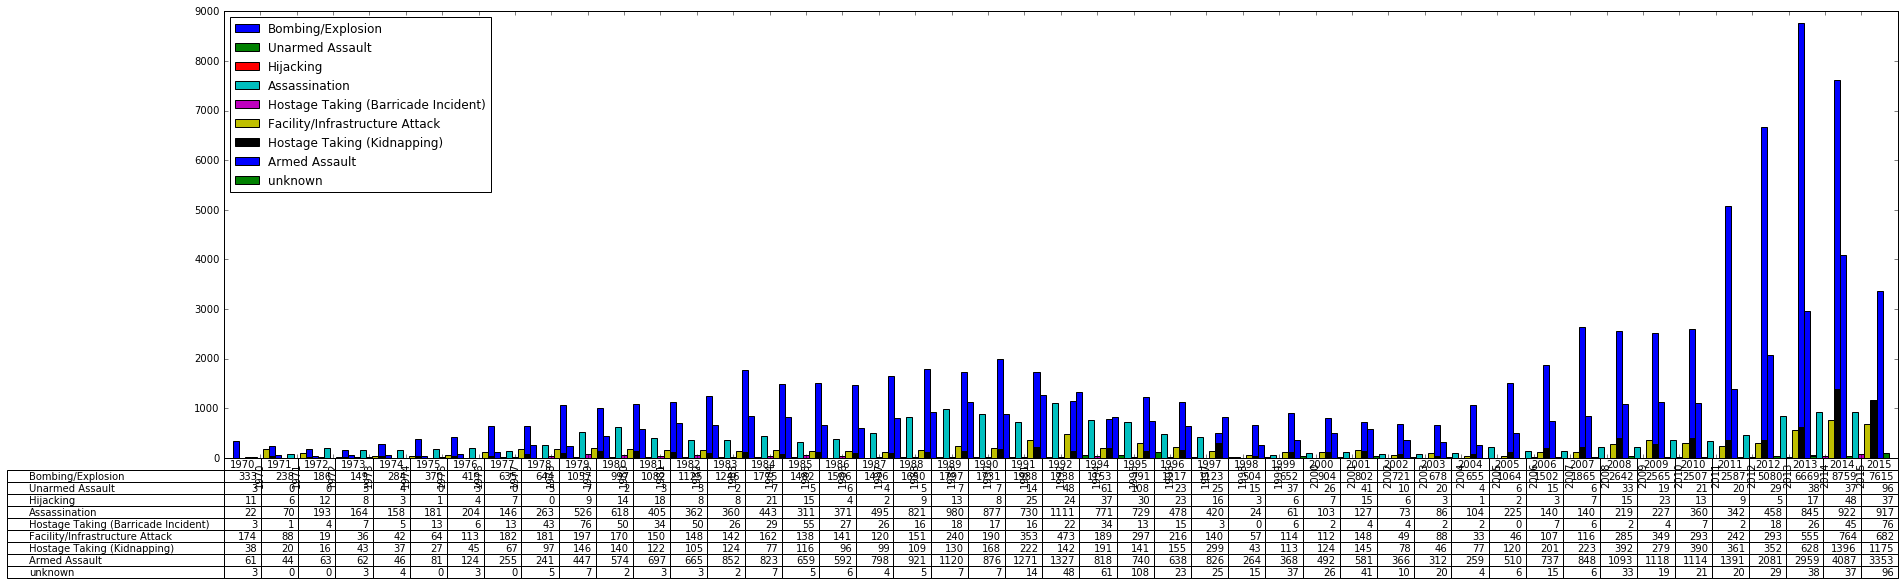

In [36]:
weapon_type_df = pd.DataFrame(weapon_type)
weapon_type_dfg = weapon_type_df[year] == 2
weapon_type_df_t = weapon_type_df.T
weapon_type_df_t.columns = ['Bombing/Explosion', 'Unarmed Assault' , 'Hijacking', 'Assassination', 'Hostage Taking (Barricade Incident)',
                           'Facility/Infrastructure Attack', 'Hostage Taking (Kidnapping)', 'Armed Assault', 'unknown']
weapon_type_df_t.plot(kind='bar',figsize=(30,8), table=True, width=1.5)
plt.savefig('popular.png')

## Most succesful terrorist

In [37]:
successfulterror = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',  
                usecols=[ 26, 58]
               )
ls = []
for i in set(successfulterror.gname):
    select = successfulterror['gname'] == i
    selector = successfulterror[select]
    successselector = selector['success'] == 1
    countthem = selector[successselector].index
    ls.append([i, len(countthem)])

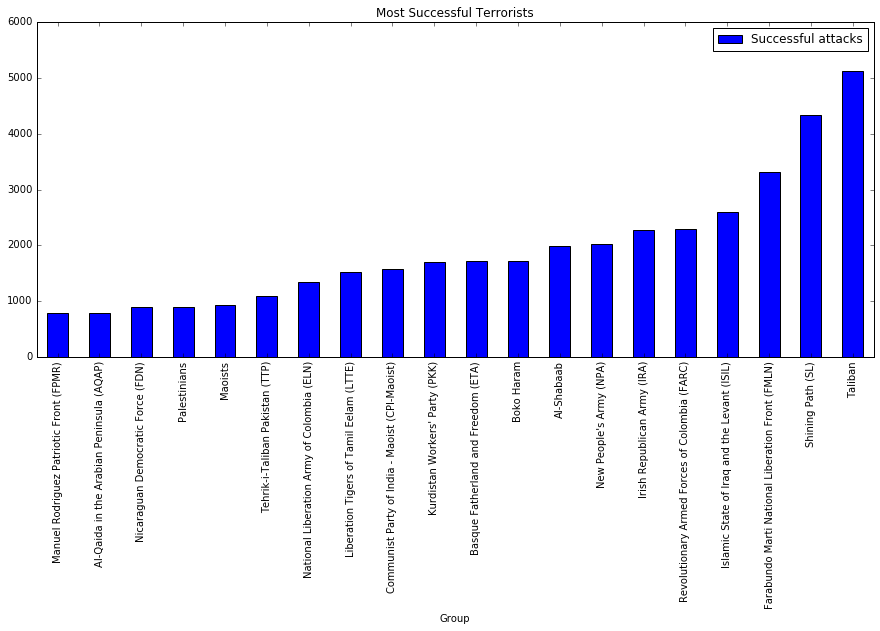

In [38]:
sucdf =  pd.DataFrame(ls)
sucdf.columns =  ["Group", 'Successful attacks']
sucdf= sucdf.sort_values(['Successful attacks'], ascending= True)
sucdf = sucdf[-21:]
sucdf = sucdf[:-1] # Last one is Unknown
sucdf.plot(kind='bar',x='Group',y='Successful attacks', figsize=(15,6), title='Most Successful Terrorists')

## Are we in peace now?

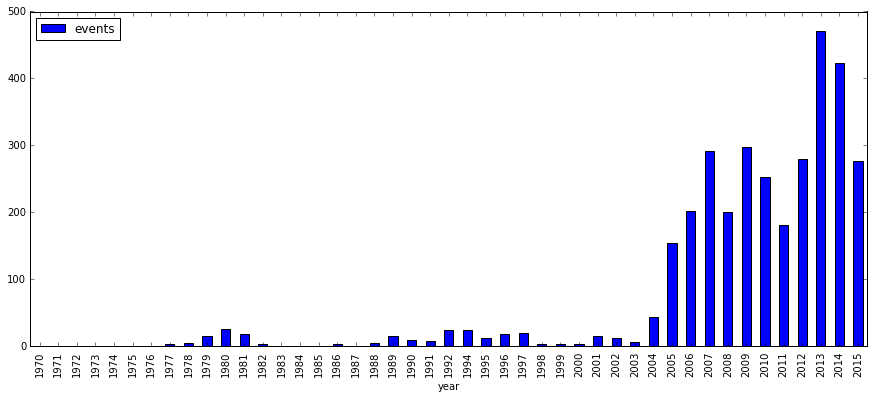

In [39]:
#  Assumptions - Death rate should be low, Terrorism should be lesser compared to previous 15 years, Low mortality rate
sort_thai_df.plot(kind='bar',x='year',y='events', figsize=(15,6))
#Short answer no, Death rate very near as 15 years ago Althought mortality rate now 12.30 vs 22.50 in 2000
# Popular terrorist seem to be remaining popular, no control, success rate is increasing